<a href="https://colab.research.google.com/github/megharajs07/Dav3/blob/main/Chi_Squared_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
2+2

4

## Chi Square test

### Problem 1
- You have a coin. you wish to ensure that it is fair.
- You decide to toss it 50 times, and note the observations.
- The observed outcomes from 50 coin tosses are 28 heads and 22 tails.
- Determine if the coin is fair or biased.

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chisquare # Statistical test (chistat, pvalue)
from scipy.stats import chi2

In [10]:
# H0 - The coin is fair
# Ha = The coin is biased

# - Distribution: chi square distribution as it is categorical
# Alpha value is 0.05

chi_stat, pvalue = chisquare(
    [28, 22], # Observed or Actual Values
    [25, 25]  # Expected Values
)

print(f'P - Value = {pvalue}')
print(f'Chi Stat = {chi_stat}')

P - Value = 0.3961439091520741
Chi Stat = 0.72


In [11]:
alpha = 0.05

if pvalue < alpha:
  print("Reject H0: Coin is Biased")
else:
  print("Failed to reject H0: Coin is Fair")

Failed to reject H0: Coin is Fair


In [12]:
# For P-Value we use to do "1 - norm.cdf(Z)"
# For Chi Square it would be "1 - chi2.cdf(chistat, df)" ==> "1 - chi2.cdf(0.72, df=1)"
1 - chi2.cdf(0.72, df=1)

np.float64(0.3961439091520741)

### Problem 2
- You have a coin. you wish to ensure that it is fair.
- You decide to toss it 50 times, and note the observations.
- The observed outcomes from 50 coin tosses are 45 heads and 5 tails.
- Determine if the coin is fair or biased.

In [13]:
# H0 - The coin is fair
# Ha = The coin is biased

# - Distribution: chi square distribution as it is categorical
# Alpha value is 0.05

chi_stat, pvalue = chisquare(
    [45, 5], # Observed or Actual Values
    [25, 25]  # Expected Values
)

print(f'P - Value = {pvalue}')
print(f'Chi Stat = {chi_stat}')

alpha = 0.05

if pvalue < alpha:
  print("Reject H0: Coin is Biased")
else:
  print("Failed to reject H0: Coin is Fair")

P - Value = 1.5417257900280013e-08
Chi Stat = 32.0
Reject H0: Coin is Biased


### Problem 3
- Online shopping table with following values based on gender


---
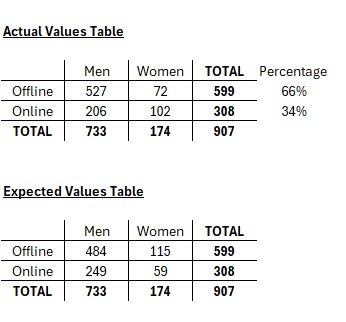


In [14]:
from scipy.stats import chi2_contingency

In [15]:
observed = [
    [527, 72],
    [206, 102]
]

chi2_contingency(observed) # chi_stat, pvalue, df, expected values

Chi2ContingencyResult(statistic=np.float64(57.04098674049609), pvalue=np.float64(4.268230756875865e-14), dof=1, expected_freq=array([[484.08710033, 114.91289967],
       [248.91289967,  59.08710033]]))

In [17]:
chi_stat, p_value, df, exp_freq = chi2_contingency(observed)
print(f'P - Value = {p_value}')
print(f'Chi Stat = {chi_stat}')
print(f'Degree of Freedom = {df}')
print(f'Expected Frequency = {exp_freq}')

alpha = 0.05

if pvalue < alpha:
  print("Reject H0: Gender and Preference are not Independent, Gender has a dependency on Preference")
else:
  print("Failed to reject H0: Gender does not have a dependency on Preference")

P - Value = 4.268230756875865e-14
Chi Stat = 57.04098674049609
Degree of Freedom = 1
Expected Frequency = [[484.08710033 114.91289967]
 [248.91289967  59.08710033]]
Reject H0: Gender and Preference are not Independent, Gender has a dependency on Preference


### Problem 4
- Aerofit use case

In [18]:
!wget --no-check-certificate https://drive.google.com/uc?id=1fSKOoZcIfLTFMvyQ37RvGH168g5nVMDD -O aerofit.csv

--2025-04-20 14:14:52--  https://drive.google.com/uc?id=1fSKOoZcIfLTFMvyQ37RvGH168g5nVMDD
Resolving drive.google.com (drive.google.com)... 74.125.196.100, 74.125.196.139, 74.125.196.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.196.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1fSKOoZcIfLTFMvyQ37RvGH168g5nVMDD [following]
--2025-04-20 14:14:52--  https://drive.usercontent.google.com/download?id=1fSKOoZcIfLTFMvyQ37RvGH168g5nVMDD
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.12.132, 2607:f8b0:400c:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.12.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7461 (7.3K) [application/octet-stream]
Saving to: ‘aerofit.csv’

aerofit.csv         100%[===================>]   7.29K  --.-KB/s    in 0s      

2025-04-20 14:14:54 (58.9 MB/s) - ‘ae

In [20]:
df_aerofit = pd.read_csv('aerofit.csv')
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [21]:
gender_product = pd.crosstab(index = df_aerofit['Gender'], columns=df_aerofit['Product'])
gender_product # This will give the count of each gender for each product

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [22]:
chi_stat, p_value, df, exp_freq = chi2_contingency(gender_product)

print(f'P - Value = {p_value}')
print(f'Chi Stat = {chi_stat}')
print(f'Degree of Freedom = {df}')
print(f'Expected Frequency = {exp_freq}')

alpha = 0.05

if pvalue < alpha:
  print("Reject H0: Gender Impacts the product")
else:
  print("Failed to reject H0: Gender has no impact on product")

P - Value = 0.0015617972833158714
Chi Stat = 12.923836032388664
Degree of Freedom = 2
Expected Frequency = [[33.77777778 25.33333333 16.88888889]
 [46.22222222 34.66666667 23.11111111]]
Reject H0: Gender Impacts the product
